In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import time

In [22]:
x = pd.read_csv("/content/0_x.csv",header=None)
y = pd.read_csv("/content/0_y.csv", header=None)

In [23]:
x.shape, y.shape

((387, 5), (387, 1))

In [24]:
x, y

(            0         1         2         3         4
 0    0.071841  0.855352 -0.305597  0.028253  1.826895
 1    0.139521 -0.423507  0.461059 -0.447400 -0.034988
 2    1.626311 -0.257622 -0.697520  1.413219  1.086292
 3   -1.183233 -0.826343  0.073047 -0.639690 -0.503273
 4   -0.783365 -0.861232  0.951448 -0.117306  0.680597
 ..        ...       ...       ...       ...       ...
 382  0.684004  2.320728  0.380965 -1.050408 -0.151801
 383 -0.430455  2.097191  0.379874  0.135858 -1.400176
 384 -0.457141  0.940791 -0.660270  2.325658 -1.510055
 385 -0.344278 -1.209805 -2.119721 -1.485907 -0.167689
 386 -1.349114  0.715605  1.273045 -0.782789  0.683719
 
 [387 rows x 5 columns],
               0
 0     63.320498
 1    -23.426394
 2     11.982771
 3   -102.883304
 4    -49.373475
 ..          ...
 382  200.741686
 383  208.530827
 384  132.592022
 385 -248.134498
 386   74.613645
 
 [387 rows x 1 columns])

In [25]:
model = LinearRegression()
model.fit(x, y)
model.score(x, y)

0.9922198026415868

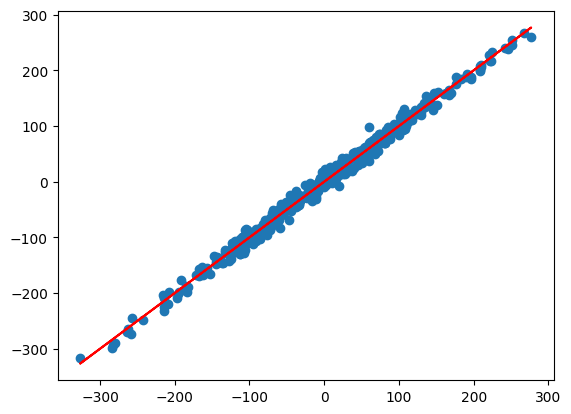

In [26]:
y_pred = model.predict(x)
plt.scatter(y_pred, y)
plt.plot(y_pred, y_pred, c='r')

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

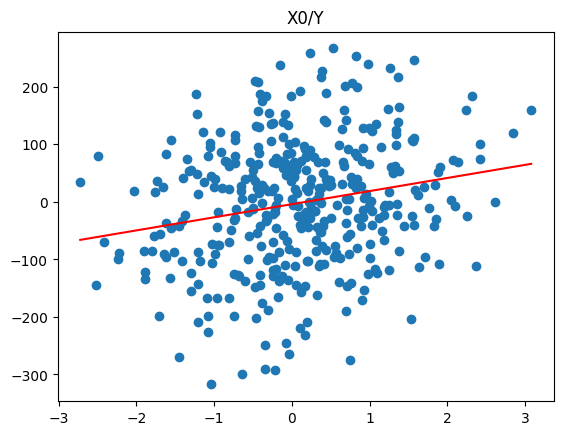

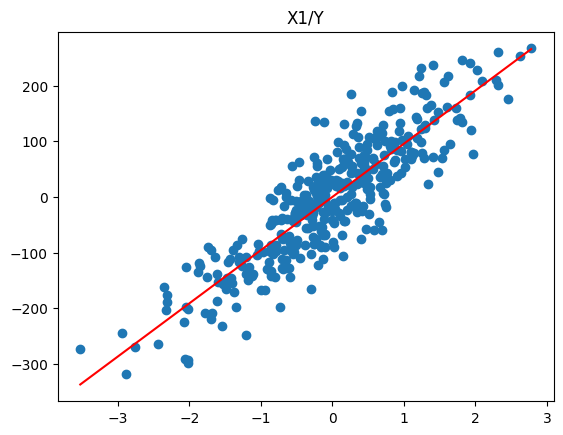

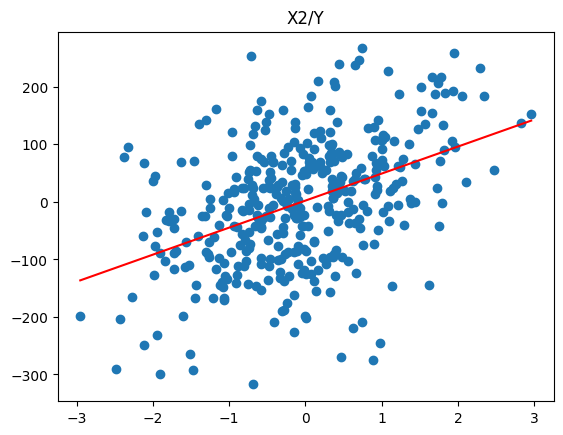

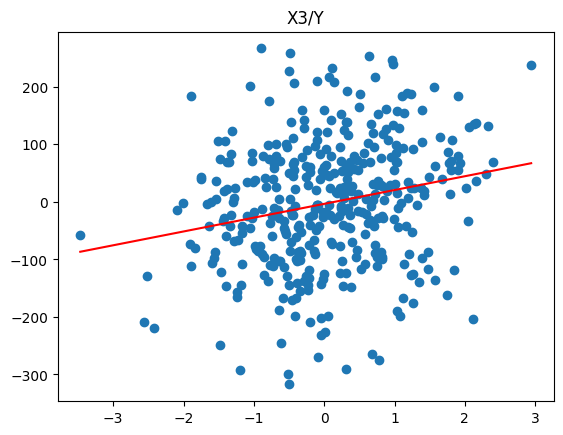

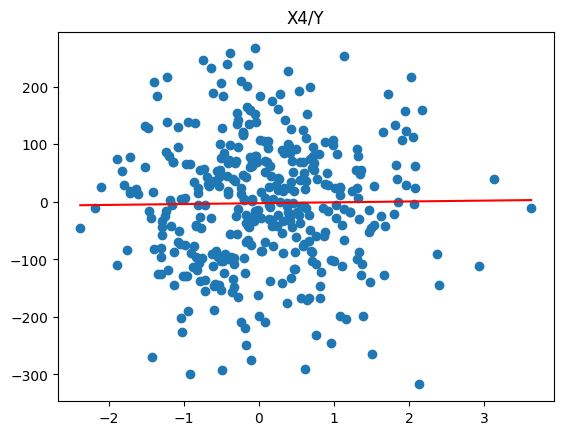

In [27]:
for i in x.columns:
    model.fit(x[[i]], y)
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, model.predict(xx), c='r')
    plt.title(f'X{i}/Y')
    plt.show()

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

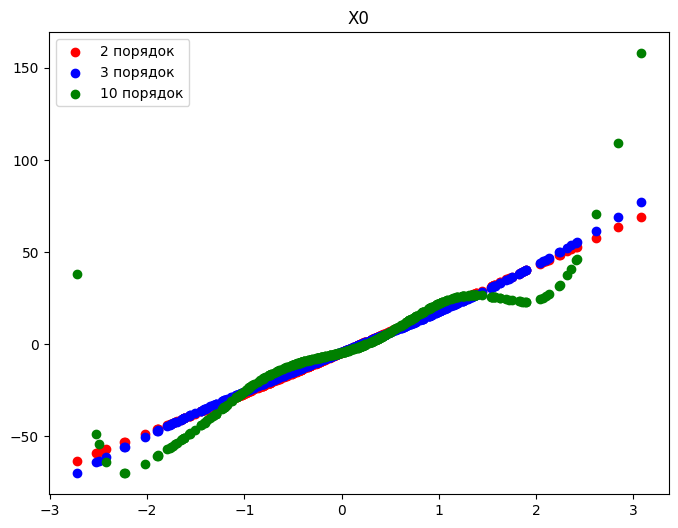

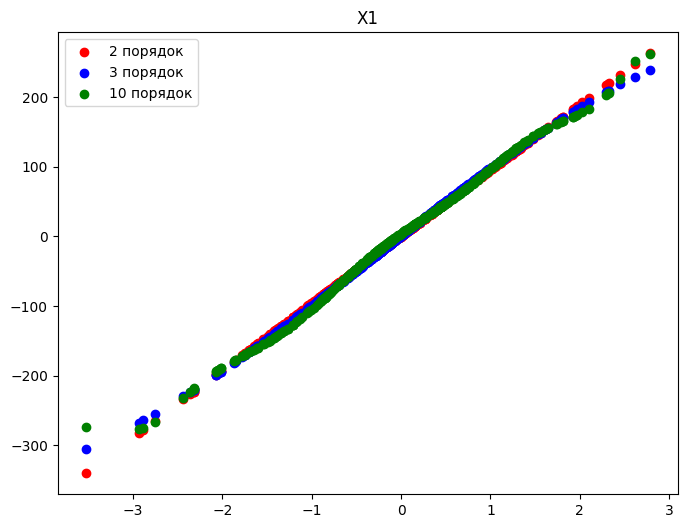

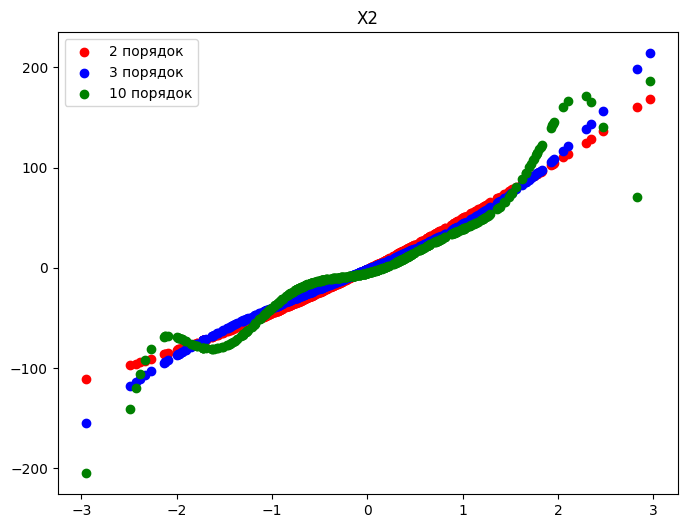

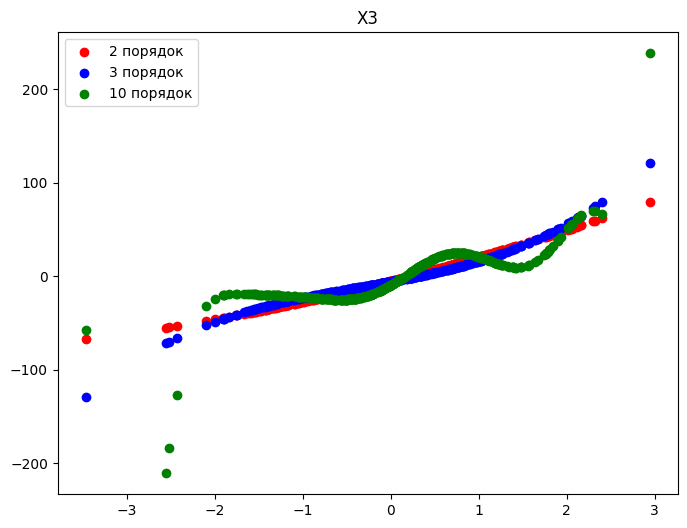

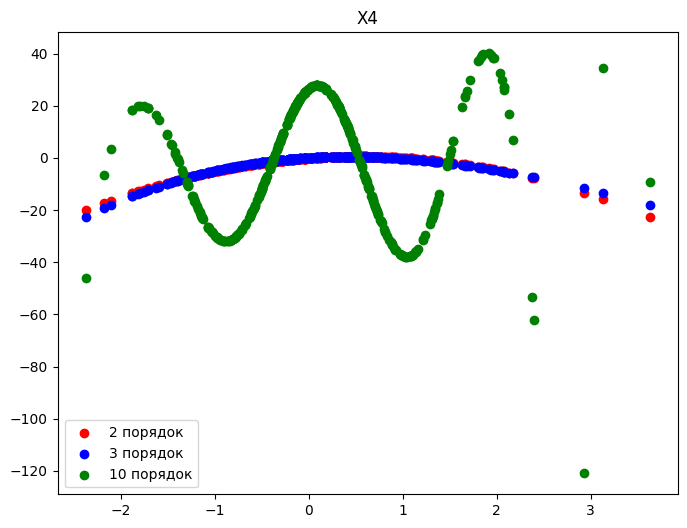

In [28]:
orders = [2, 3, 10]
colors = ['r', 'b', 'g']
for i in x.columns:
    plt.figure(figsize=(8, 6))
    for j, index in enumerate(orders):
        poly = make_pipeline(PolynomialFeatures(index), LinearRegression())
        poly.fit(x[[i]], y)
        y_pred = poly.predict(x[[i]])
        color = colors[j]
        plt.scatter(x[[i]], y_pred, color=color, label=f'{index} порядок')

    plt.title(f'X{i}')
    plt.legend()
    plt.show()

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [29]:
results = pd.DataFrame(columns=['X', 'MAE', 'MSE', 'R-squared'])
for i in x.columns:
    x_i = x[[i]]
    x_train, x_test, y_train, y_test = train_test_split(x_i, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    results.loc[i] = [f'X{i}', mae, mse, r_squared]

results

,X,MAE,MSE,R-squared
0,X0,96.962735,14533.522505,0.054417
1,X1,37.938106,2279.647648,0.851681
2,X2,95.592347,13786.104404,0.103045
3,X3,96.751914,14750.414829,0.040305
4,X4,99.695928,15436.277540,-0.004318


5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [30]:
results = pd.DataFrame(columns=['X', 'MAE', 'MSE', 'RMSE', 'R-squared', 'MAPE'])

for i in x.columns:
    x_i = x[[i]]
    x_train, x_test, y_train, y_test = train_test_split(x_i, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results.loc[i] = [f'X{i}', mae, mse, rmse, r_squared, mape]

results

,X,MAE,MSE,RMSE,R-squared,MAPE
0,X0,96.962735,14533.522505,120.555060,0.054417,1.140391
1,X1,37.938106,2279.647648,47.745656,0.851681,1.686133
2,X2,95.592347,13786.104404,117.414243,0.103045,2.126390
3,X3,96.751914,14750.414829,121.451286,0.040305,2.439805
4,X4,99.695928,15436.277540,124.242817,-0.004318,1.104380


6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [31]:
DFtimes = pd.DataFrame(columns=['Степень полинома', 'Время обучения (секунды)'])
degrees = [2, 3, 10]
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    start_time = time.time()
    model.fit(x, y)
    end_time = time.time()
    times = end_time - start_time
    DFtimes = DFtimes.append({'Степень полинома': degree, 'Время обучения (секунды)': times}, ignore_index=True)

DFtimes

<ipython-input-31-5188e28e87f1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DFtimes = DFtimes.append({'Степень полинома': degree, 'Время обучения (секунды)': times}, ignore_index=True)
<ipython-input-31-5188e28e87f1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DFtimes = DFtimes.append({'Степень полинома': degree, 'Время обучения (секунды)': times}, ignore_index=True)
<ipython-input-31-5188e28e87f1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DFtimes = DFtimes.append({'Степень полинома': degree, 'Время обучения (секунды)': times}, ignore_index=True)


,Степень полинома,Время обучения (секунды)
0,2.0,0.010436
1,3.0,0.022652
2,10.0,0.452263


1. Модель с более высокой степенью полинома требует больше времени на обучение.

2. Высокая степень полинома может привести к переобучению модели, но это озночает, что улучшилось качество предсказаний.

Модель с полиномом степени 2 является более эффективной